# Part 1: Predict the price of a house.


**Problem statement:** The goal is to understand the relationship between house features and how these variables affect the house price. Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model.

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
url = "/content/DS - Assignment Part 1 data set.xlsx"
df = pd.read_excel(url)

In [3]:
# To show us the first five records of the dataframe.
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#This gives us details about each individual column's null values  and data-types it contains.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
# It gives us the various details about the numerical columns in the dataframe.
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
# To check whether there are any null values in the dataframe and to resolve this issue.
print('The number of null values are:',df.isnull().sum().sum())

The number of null values are: 0


<Figure size 720x720 with 0 Axes>

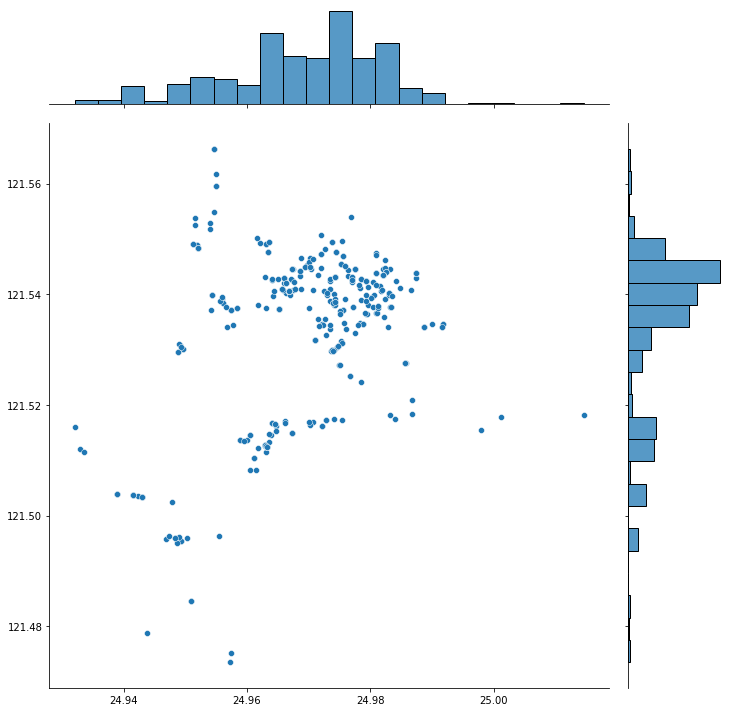

In [28]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.latitude.values,y=df.longitude.values,size=10)
plt.ylabel('Longitude',fontsize=10)
plt.xlabel('Latitude',fontsize=10)
plt.show()

([<matplotlib.patches.Wedge at 0x7f3e1d9ac510>,
 [Text(0.5281726034101268, 0.9649008762598202, ''),
  Text(-1.0992083190997568, -0.04172614554314337, ''),
  Text(0.5643939218059199, -0.9441713303360431, '')],
 [Text(0.2880941473146146, 0.5263095688689928, '34%'),
  Text(-0.5995681740544127, -0.02275971575080547, '33%'),
  Text(0.3078512300759562, -0.5150025438196598, '33%')])

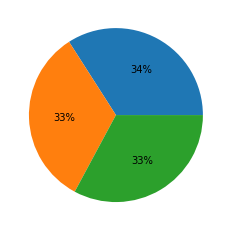

In [31]:
# Chart for comparing the values in "STATUS" feature.
plt.pie(df['Number of bedrooms'].value_counts(),autopct='%.0f%%')

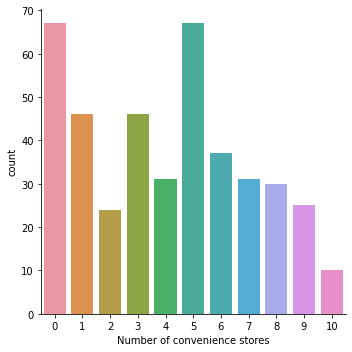

In [30]:
#Chart for finding outliers in a particular feature.
sns.factorplot('Number of convenience stores',data=df,kind='count')

In [32]:
# Dropping columns of the dataframe.
df.drop('Transaction date',axis = 1, inplace=True)
df.shape

(414, 8)

In [33]:
# Scaling the columns of the data in a fixed range.
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
cols=df.columns
df= ms.fit_transform(df)
df= pd.DataFrame(df,columns=cols)

In [47]:
# Splitting the complete data into training and test data.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
x=df.drop('House price of unit area',axis = 1)
y=df['House price of unit area'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Using various Machine Learning Models:

# 1) K-Neighbors Regressor

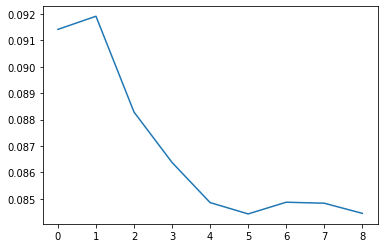

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = []
for K in range(1,10):
    knr = KNeighborsRegressor(n_neighbors = K)
    knr.fit(x_train, y_train)
    pred=knr.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
plt.plot(rmse_val)

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
knr_pred = knr.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

0.04481950374466297


# 2) Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='absolute_error',random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

0.04481950374466297


# 3) Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

0.04481950374466297


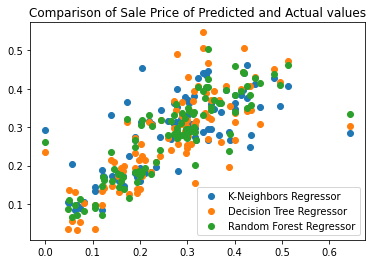

In [87]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(y_test,knr.predict(x_test),label='K-Neighbors Regressor')
plt.scatter(y_test,dt.predict(x_test),label='Decision Tree Regressor')
plt.scatter(y_test,rfr.predict(x_test),label='Random Forest Regressor')
plt.legend()

In [88]:
df1 = pd.DataFrame({'Actual_Values':y_test,'knr':knr_pred,'dt':dt_pred,'rfr':rfr_pred})
df1

,Actual_Values,knr,dt,rfr
0,0.343039,0.266242,0.270246,0.504413
1,0.061874,0.083894,0.131938,0.096542
2,0.349409,0.295359,0.321201,0.345560
3,0.072793,0.090628,0.052775,0.112593
4,0.387625,0.287352,0.197452,0.239263
...,...,...,...,...
99,0.302093,0.370701,0.431301,0.351010
100,0.434031,0.278617,0.344859,0.357816
101,0.299363,0.309918,0.317561,0.290255
102,0.302093,0.298817,0.277525,0.294732


In [90]:
print(knr.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rfr.score(x_test,y_test))

0.48233375757345054
0.5425846259588294
0.6907037993313556
